In [1]:
# connect to ue
from unrealcv import client
client.connect()
if not client.isconnected():
    print('UnrealCV server is not running. Run the game downloaded from http://unrealcv.github.io first.')
    sys.exit(-1)

INFO:__init__:234:Got connection confirm: b'connected to warehouse_simple'


=> Info: Use inet client...
=>Info: using ip-port socket


In [57]:
# check config
res = client.request('vget /unrealcv/status')
# The image resolution and port is configured in the config file.
print(res)

Is Listening
Client Connected
9000
Configuration
Config file: /Users/Shared/Epic Games/UE_4.27/Engine/Binaries/Mac/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



In [191]:
# import stuff
import numpy as np
from matplotlib import pyplot as plt

In [224]:
# save images
res = client.request('vget /camera/1/lit /Users/hiro/warehouse_sim/lit.png')
res = client.request('vget /camera/1/object_mask /Users/hiro/warehouse_sim/object.png')
res = client.request('vget /camera/1/normal /Users/hiro/warehouse_sim/normal.png')

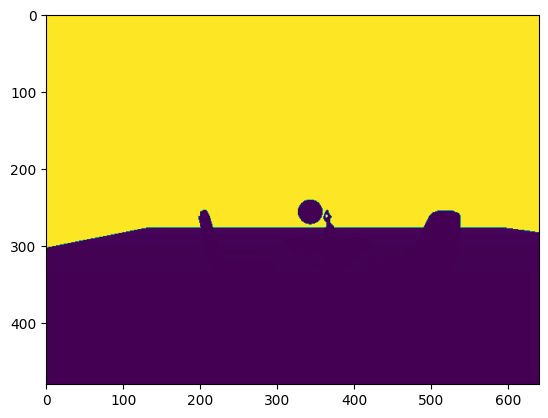

In [226]:
# get depth image
res = client.request('vget /camera/1/depth /Users/hiro/warehouse_sim/depth.npy')
img_array = np.load('depth.npy')
plt.imshow(img_array)
plt.show()

In [218]:
# get camera location
res = client.request(f'vget /camera/1/location')
print(res)
res = client.request(f'vget /camera/1/rotation')
print(res)

0.000 0.000 200.000
0.000 180.000 0.000


ok


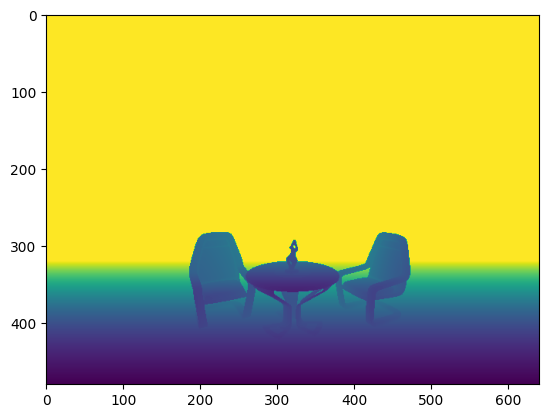

In [230]:
res = client.request(f'vset /camera/1/location 150 0 200')
res = client.request(f'vset /camera/1/rotation 0 -180 0')
print(res)
res = client.request('vget /camera/1/depth /Users/hiro/warehouse_sim/depth.npy')
img_array = np.load('depth.npy')
plt.imshow(img_array)
plt.show()

In [90]:
res = client.request('vget /objects')
print(res)

InstancedFoliageActor_0 Floor_14 Table Chair Chair_15 Statue Cube_2 Brush_1 CameraActor_0 GameplayDebuggerCategoryReplicator_0 GameplayDebuggerPlayerManager_0 HUD_0 Starter_Background_Cue_2 ParticleEventManager_0 PlayerCameraManager_0 UnrealcvWorldController_0 BP_Sky_Sphere_C_2 GameModeBase_0 GameStateBase_0 SkyLight_1 GameNetworkManager_0 GameSession_0 PlayerState_0 WorldSettings_1 PlayerController_0 AbstractNavData-Default DefaultPawn_0 Minimal_Default_C_0 SphereReflectionCapture10 SphereReflectionCapture_1 LightSource PlayerStart GlobalPostProcessVolume DefaultPhysicsVolume_0 


In [164]:
res = client.request(f'vget /cameras')
print(res)

PawnSensor FusionCameraSensor 
